In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import sys

from sklearn.preprocessing import StandardScaler

In [2]:
assert hasattr(tf, "function") # tester tf 2.0

In [3]:
from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# on ne veut pas le dataset entier
images = images[:10000]
targets = targets[:10000]

#print(images.shape)
#print(targets.shape)

#print(images.mean())
#print(images.std())

images = images.reshape(-1, 784)
images = images.astype(float)
print(images.shape)
scaler = StandardScaler()
images = scaler.fit_transform(images)

images_train, images_test, target_train, target_test = train_test_split(images, targets, test_size=0.2, random_state = 1)

#print(images_train.shape, target_train.shape)
#print(images_test.shape, target_test.shape)

#print(images.mean())
#print(images.std())

# print(images[0])
# print(target[0])

(10000, 784)


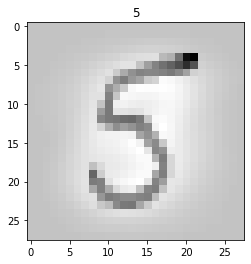

In [4]:
targets_names = ["0", "1", "2", "3", "4", "5",
                 "6", "7", "8", "9"]

# on affiche une image
plt.imshow(images[9462].reshape(28, 28), cmap="binary")
plt.title(targets_names[targets[9462]])
plt.show()

In [5]:
# on va créer le modele, 256 neurones into 128, puis 10 neurones en sortie
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # on passe l'image de hotshot en un seul vecteur, plus besoin avec le truc importé en haut
model.add(tf.keras.layers.Dense(256, activation="relu")) # on crée le premier layer
model.add(tf.keras.layers.Dense(128, activation="relu")) # on crée le second layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) # on crée le layer d'output

model_output = model.predict(images[0:1]) # on fait une predictino sur la premiere image du dataset
print(model_output, targets[0:1])

[[0.18647307 0.11299474 0.02982679 0.18921183 0.18777962 0.060893
  0.16500033 0.0140585  0.03921632 0.01454577]] [5]


In [6]:
# on compile le modele : on utilise telle fonction d'erreur
# sgd = stochistic gradient descent
# sparse pour psa avoir besoin de faire du one-hot

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [7]:
# train the model

history = model.fit(images_train, target_train, epochs = 10, validation_split=0.2)

W0614 09:07:41.659848  7932 deprecation.py:323] From c:\users\timon\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 81us/sample - loss: 1.1256 - accuracy: 0.6833 - val_loss: 0.6303 - val_accuracy: 0.8356
Epoch 2/10
6400/6400 [==============================] - 0s 54us/sample - loss: 0.4541 - accuracy: 0.8791 - val_loss: 0.4320 - val_accuracy: 0.8831
Epoch 3/10
6400/6400 [==============================] - 0s 55us/sample - loss: 0.3219 - accuracy: 0.9119 - val_loss: 0.3672 - val_accuracy: 0.8981
Epoch 4/10
6400/6400 [==============================] - 0s 54us/sample - loss: 0.2592 - accuracy: 0.9309 - val_loss: 0.3327 - val_accuracy: 0.9069
Epoch 5/10
6400/6400 [==============================] - 0s 54us/sample - loss: 0.2183 - accuracy: 0.9422 - val_loss: 0.3110 - val_accuracy: 0.9131
Epoch 6/10
6400/6400 [==============================] - 0s 53us/sample - loss: 0.1883 - accuracy: 0.9522 - val_loss: 0.2967 - val_accuracy: 0.9181
Epoch 7/10
6400/6400 [==============================] - 0s 54us/sample

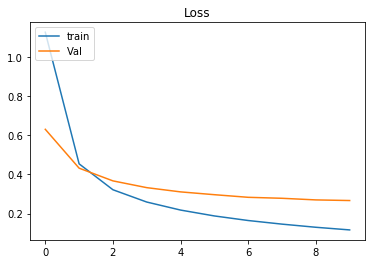

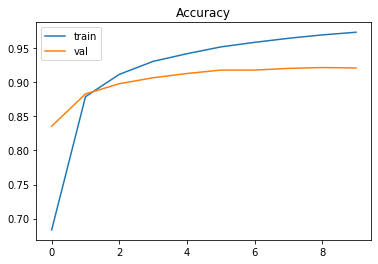

In [8]:

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="train")
plt.plot(loss_val_curve, label="Val")
plt.title("Loss")
plt.legend(loc="upper left")
plt.show()

plt.plot(acc_curve, label="train")
plt.plot(acc_val_curve, label="val")
plt.title("Accuracy")
plt.legend(loc="upper left")
plt.show()

[[8.2029883e-06 5.6369286e-06 1.9000801e-04 9.9335021e-01 3.3622760e-07
  3.7134627e-03 3.5669456e-07 1.0902332e-07 2.4685019e-03 2.6319816e-04]] [3]


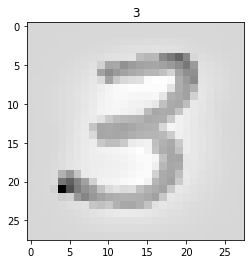

In [9]:
print(model.predict(images_test[0: 1]), target_test[0:1])
plt.imshow(images_test[0].reshape(28, 28), cmap="binary")
plt.title(target_test[0])
plt.show()

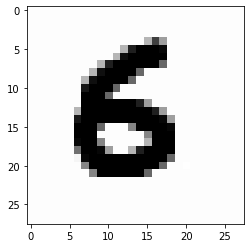

In [33]:
import cv2
import numpy as np

img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
img = img.astype('float32')
img = img.reshape(-1, 784)
img = 255-img
img /= 255
plt.imshow(img.reshape(28, 28), cmap="binary")
plt.show()

In [34]:
model_output = model.predict(img) # on fait une predictino sur la premiere image du dataset
print(model_output)

[[0.05642354 0.01645117 0.13637318 0.14071567 0.01421119 0.04142617
  0.08825444 0.00923527 0.39166087 0.1052485 ]]
